# Relatório de Análise 8

## Identificando e Removendo Outliers

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [21]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

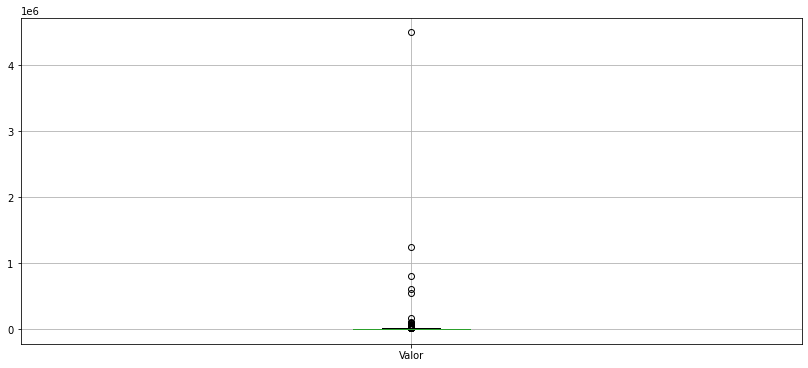

In [22]:
dados.boxplot(['Valor'])

In [23]:
dados[dados['Valor']>= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [24]:
valor = dados['Valor']

In [25]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [26]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

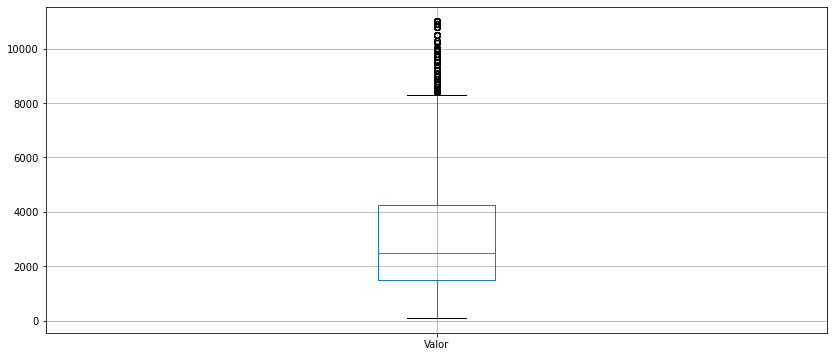

In [27]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002192FA0C970>]],
      dtype=object)

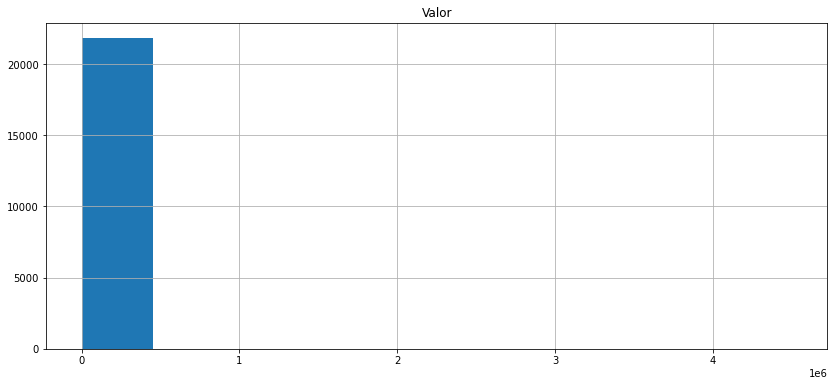

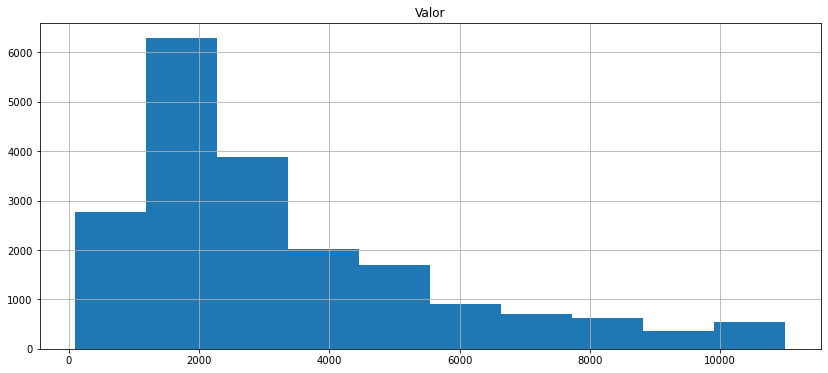

In [28]:
# Analisar os outliers é importante! Quais valores fogem muito do resto?

dados.hist(['Valor'])
dados_new.hist(['Valor'])

### Exercício - Boxplot

In [29]:
dadosEx = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')
dadosEx.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


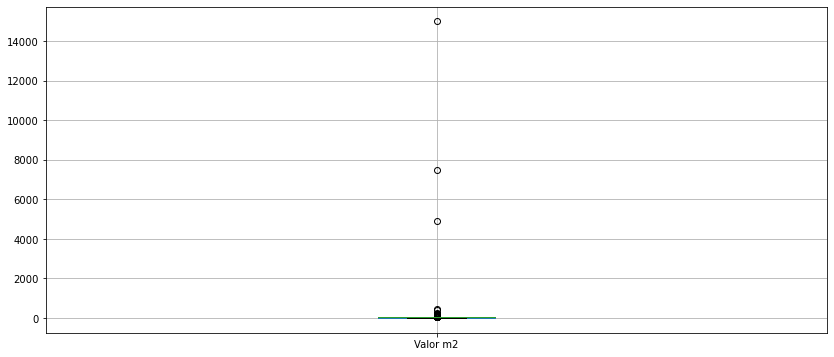

In [32]:
dadosEx.boxplot(['Valor m2'])

In [37]:
# Para descobrir os quartis irei utilizar a função describe()
dadosEx['Valor m2'].describe().round(2)

count    10000.00
mean        37.08
std        175.30
min          2.78
25%         21.25
50%         30.00
75%         42.31
max      15000.00
Name: Valor m2, dtype: float64

In [39]:
# Mas não precisamos utilizar o describe, podemos utilizar as funções ensinadas na última aula
valor_metros2 = dadosEx['Valor m2'] # fazendo uma separação nos dados
Q1 = valor_metros2.quantile(.25)
Q3 = valor_metros2.quantile(.75)
IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [43]:
IIQ

21.060000000000002

In [44]:
limite_inferior

-10.340000000000003

In [45]:
limite_superior

73.9

In [47]:
selecao = (valor_metros2 >= limite_inferior) & (valor_metros2 <= limite_superior)


0        True
1        True
2        True
3        True
4        True
        ...  
9995    False
9996     True
9997     True
9998     True
9999     True
Name: Valor m2, Length: 10000, dtype: bool

In [48]:
dadosEx_new = dadosEx[selecao]

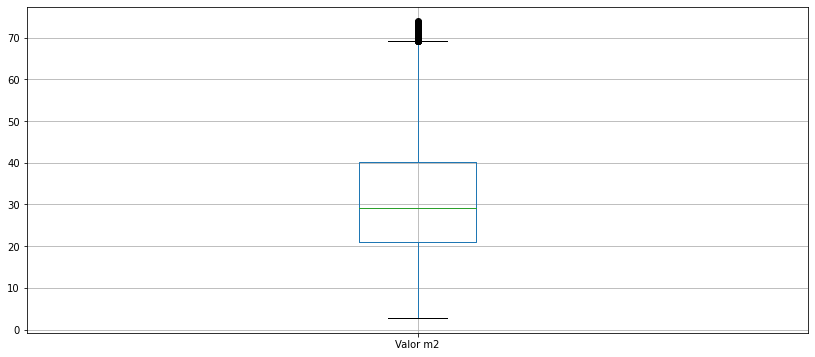

In [51]:
dadosEx_new.boxplot(['Valor m2'])

In [52]:
# Veja e compare, a visualização de dados já ficou muito melhor com a seleção dos dados

### Identificando e Removendo Outliers por Grupo

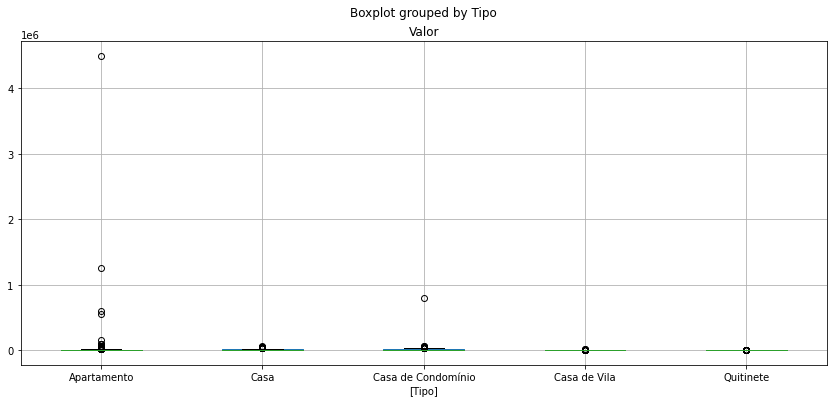

In [54]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [56]:
# Retirar outliers de forma irrestrita, sem checar todos os grupos, pode retirar informações importantes da análise
# Vamos utilizar um groupby para selecionar um grupo somente do valor
grupo_tipo = dados.groupby('Tipo')['Valor']

In [57]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [58]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [59]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [65]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [66]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [67]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [68]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [70]:
#for tipo in grupo_tipo.groups.keys():
#    eh_tipo = dados['Tipo'] == tipo
#    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo] & (dados['Valor'] <= limite_superior[tipo]))
#    selecao = eh_tipo & eh_dentro_limite
#    dados_selecao = dados[selecao]   

TypeError: Cannot perform 'rand_' with a dtyped [bool] array and scalar of type [bool]

## Extra - Mais sobre gráficos

In [88]:
dados = pd.read_csv('dados/aluguel.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [89]:
area = plt.figure()

<Figure size 1008x432 with 0 Axes>

In [90]:
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)

In [93]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

C:\Users\lui-m\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lui-m\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Valor Médio por Tipo')

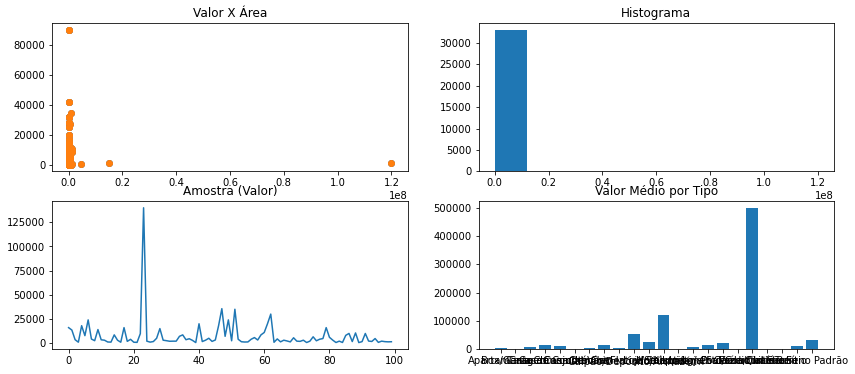

In [94]:
area

In [95]:
# Como salvar a figura
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')

## Exercício

In [96]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

dados = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

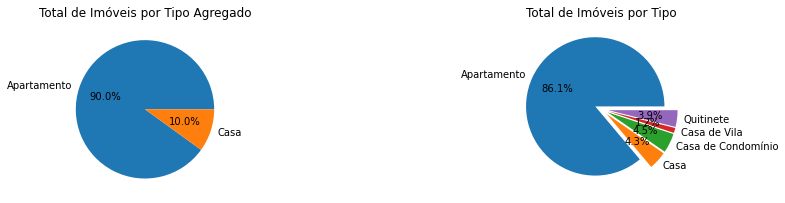

In [97]:
area = plt.figure()
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

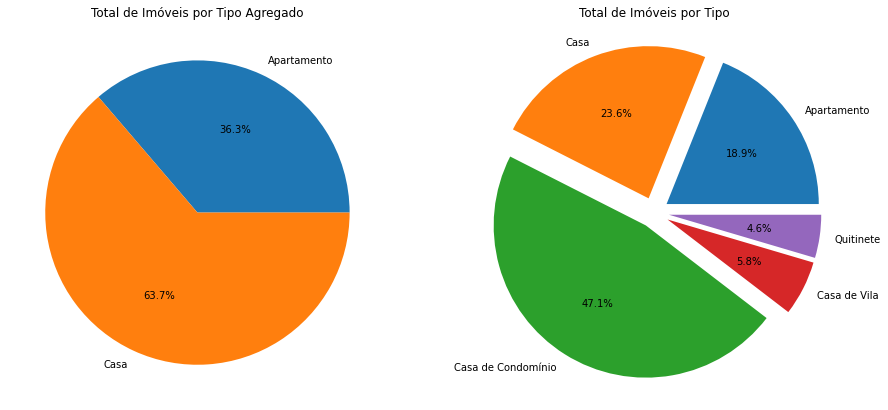

In [98]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.mean().index
valores = grupo1.mean().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.mean().index
valores = grupo2.mean().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

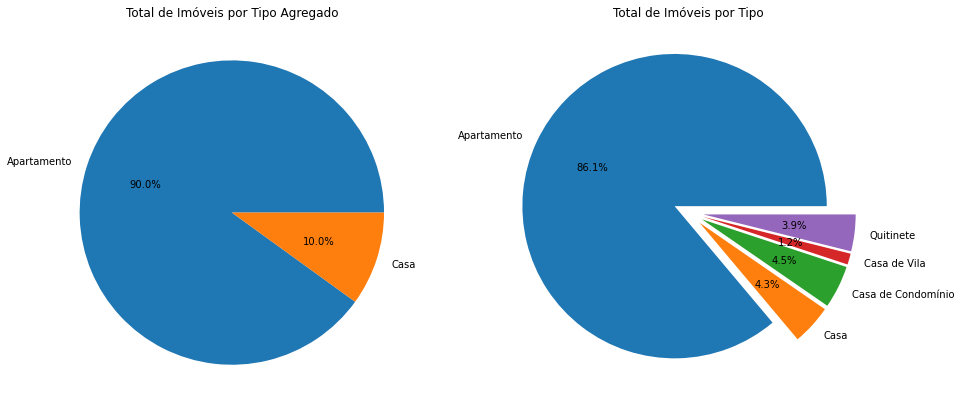

In [99]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')